# Experiments on the Marvel Comics by Time Period


In [1]:
%pylab inline
import networkx as nx
import seaborn as sns
from scipy import sparse
import sys,os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 1. Set up folders for code, data, and figures

In [2]:
# folder containing supracentrality codes
code_folder = '../supracentrality/' 
sys.path.append(code_folder)

In [3]:
from supracentrality import *
from load_Marvel_Comics import *

In [4]:
# folder containing data
data_folder = '../data/Marvel Comics' 

# folder where to save figures
fig_folder = 'figs' 
if os.path.isdir(fig_folder)==False: os.mkdir(fig_folder) 

## 2. Load and visualize Marvel Comics data

#### First, for visualization purposes, create a network that aggregates all data into a single network

In [5]:
def visualize_network(A,labbels,show_labels,show_floating_nodes):
    ids = range(len(A))
    if ~show_floating_nodes:
        N_temp  = len(A)
        ids = np.where(np.sum(A,1))[0]
        A = A[ids,:]
        A = A[:,ids]  
        labbels = [labbels[i] for i in ids]
        
    G = nx.from_numpy_matrix(A)
    x = abs(np.array(list(nx.pagerank(G, alpha=0.85).values()))) + 10**-14
    pos = pos = nx.kamada_kawai_layout(G)


    fig = figure(figsize=(15,15));
    nodes = nx.draw_networkx_nodes(G, pos,alpha=.4,node_size=x*10**4,node_color=x,cmap='hot')
    edges = nx.draw_networkx_edges(G, pos,alpha=.2,width=.5)
    
    if show_labels:
        labels = {}
        for j in range(len(labbels)):
            labels[j] = labbels[j]
        labels2 = nx.draw_networkx_labels(G, pos,labels,font_size=8,alpha=0.5);
        
    plt.axis('off');
    print('visualizing '+ str(len(ids)) + ' nodes' )    
    return

In [ ]:
period_id = 0
show_labels = True
show_floating_nodes = False
print('year = '+ str(temporal_MC_graph['layer_names'][year_id])+'\n')
visualize_network(temporal_PhD_graph['A_tensor'][year_id],temporal_PhD_graph['nodenames'],show_labels,show_floating_nodes)

In [ ]:
# compute eigenvector centrality
G = nx.from_numpy_matrix(M[0])
centrality = nx.eigenvector_centrality(G)
top10_ids = sorted(centrality, key=centrality.get, reverse=True)[:10]
print(top10_ids)
print()
print([centrality[id] for id in top10_ids])

In [ ]:
top10_characters = [ temporal_MC_graph['nodenames'][idd] for idd in top10_ids ]
top10_characters

In [ ]:
sum(M[0][7])

In [ ]:
sum(M[0][10])

In [ ]:
# compute eigenvector centrality
G = nx.from_numpy_matrix(M[0])
centrality = nx.algorithms.degree_centrality(G)
top10_ids = sorted(centrality, key=centrality.get, reverse=True)[:10]
print(top10_ids)
print()
print([centrality[id] for id in top10_ids])

In [ ]:
top10_characters = [ temporal_MC_graph['nodenames'][idd] for idd in top10_ids ]
top10_characters

In [ ]:
M[0]

In [ ]:


# compute eigenvector centrality
G = nx.from_numpy_matrix(M[1])
centrality = nx.eigenvector_centrality(G)
top10_ids = sorted(centrality, key=centrality.get, reverse=True)[:10]
print(top10_ids)
print()
print([centrality[id] for id in top10_ids])

In [ ]:
top10_characters = [ temporal_MC_graph['nodenames'][idd] for idd in top10_ids ]
top10_characters

In [ ]:
# compute eigenvector centrality
G = nx.from_numpy_matrix(M[2])
centrality = nx.eigenvector_centrality(G)
top10_ids = sorted(centrality, key=centrality.get, reverse=True)[:10]
print(top10_ids)
print()
print([centrality[id] for id in top10_ids])

In [ ]:
top10_characters = [ temporal_MC_graph['nodenames'][idd] for idd in top10_ids ]
top10_characters

In [ ]:
# COMPUTE REVERSE PAGERANK
x = pagerank(sparse.csc_matrix(M[0]).T,0.85)
top10_ids = argsort(-x)[:10]
print(top10_ids)
print()
print(x[top10_ids])

In [ ]:
top10_characters = [ temporal_MC_graph['nodenames'][idd] for idd in top10_ids ]
top10_characters

In [ ]:
# COMPUTE REVERSE PAGERANK
x = pagerank(sparse.csc_matrix(M[3]).T,0.85)
top10_ids = argsort(-x)[:10]
print(top10_ids)
print()
print(x[top10_ids])

In [ ]:
top10_characters = [ temporal_MC_graph['nodenames'][idd] for idd in top10_ids ]
top10_characters

#### Now, create a temporal network with each time layer encoding PhD exchanges for a given year

In [6]:
temporal_MC_graph = load_temporal_MC_flow_graph(data_folder)

C:\Users\shenc\OneDrive - UCLA IT Services\2022F\Math 168\Project\supracentrality-master 3\supracentrality-master\notebooks\../supracentrality\load_Marvel_Comics.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layers[0]['issue'] = layers[0]['comic'].str[2:]
C:\Users\shenc\OneDrive - UCLA IT Services\2022F\Math 168\Project\supracentrality-master 3\supracentrality-master\notebooks\../supracentrality\load_Marvel_Comics.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issues1.iloc[i, 2] = issues1.iloc[i, 2].split("/",1)[0]
C:\Users\shenc\OneDrive - UCLA IT S

['ANT-MAN/DR. HENRY J.', 'ATTUMA', 'BEAST/HENRY &HANK& P', 'BINARY/CAROL DANVERS', 'BLACK KNIGHT V/DANE', "BLACK PANTHER/T'CHAL", 'BLACK WIDOW/NATASHA', 'CAPTAIN AMERICA', 'CAPTAIN MARVEL II/MO', 'COUNT NEFARIA, LUCHI', 'CRYSTAL [INHUMAN]', 'DAREDEVIL/MATT MURDO', 'DR. DRUID/ANTHONY LU', 'FALCON/SAM WILSON', 'GRIM REAPER/ERIC WIL', 'GYRICH, HENRY PETER', 'HAWK', 'HELLCAT/PATSY WALKER', 'HERCULES [GREEK GOD]', 'HULK/DR. ROBERT BRUC', 'HUMAN TORCH/JOHNNY S', 'ICEMAN/ROBERT BOBBY', 'INVISIBLE WOMAN/SUE', 'IRON MAN/TONY STARK', 'JARVIS, EDWIN', 'LUNA/LUNA MAXIMOFF [', 'MOCKINGBIRD/DR. BARB', 'MOONDRAGON/HEATHER D', 'MR. FANTASTIC/REED R', "O'BRIEN, MICHAEL", 'PHARAOH RAMA-TUT', 'POWER MAN/ERIK JOSTE', 'QUICKSILVER/PIETRO M', 'SCARLET WITCH/WANDA', 'SHE-HULK/JENNIFER WA', 'SPIDER-MAN/PETER PARKER', 'STARFOX/EROS', 'SUB-MARINER/NAMOR MA', 'SWORDSMAN/JACQUES DU', 'THING/BENJAMIN J. GR', 'THOR/DR. DONALD BLAK', 'TIGRA/GREER NELSON', 'ULTRON', 'VISION', 'WASP/JANET VAN DYNE', 'WIZARD/BENTLEY WI

In [7]:
temporal_MC_graph

{'layer_names': ['silver', 'bronze', 'modern', 'heroes'],
 'T': 4,
 'A_tensor': [array([[ 0.,  2., 11., ..., 66.,  0.,  9.],
         [ 2.,  0.,  2., ...,  2.,  0.,  1.],
         [11.,  2.,  0., ..., 11.,  0.,  5.],
         ...,
         [66.,  2., 11., ...,  0.,  1.,  8.],
         [ 0.,  0.,  0., ...,  1.,  0.,  0.],
         [ 9.,  1.,  5., ...,  8.,  0.,  0.]]),
  array([[ 0.,  3., 42., ..., 62.,  1., 39.],
         [ 3.,  0.,  3., ...,  3.,  0.,  3.],
         [42.,  3.,  0., ..., 58.,  0., 51.],
         ...,
         [62.,  3., 58., ...,  0.,  3., 51.],
         [ 1.,  0.,  0., ...,  3.,  0.,  0.],
         [39.,  3., 51., ..., 51.,  0.,  0.]]),
  array([[ 0.,  0.,  5., ..., 32.,  2.,  9.],
         [ 0.,  0.,  0., ...,  1.,  0.,  0.],
         [ 5.,  0.,  0., ...,  1.,  0.,  1.],
         ...,
         [32.,  1.,  1., ...,  0.,  1.,  8.],
         [ 2.,  0.,  0., ...,  1.,  0.,  1.],
         [ 9.,  0.,  1., ...,  8.,  1.,  0.]]),
  array([[ 0.,  0.,  6., ..., 25.,  0., 23.],

In [8]:
#for the centrality matrix, use the Google matrix transpose
centrality_matrix_type = 'adjacency' # or adjacency, or hub, authority

if centrality_matrix_type == 'adjacency':
    centrality_function = lambda A: A
    
if centrality_matrix_type == 'pagerank':
    alpha=0.85
    centrality_function = lambda A: google_matrix(sparse.csc_matrix(A),alpha=alpha).T

if centrality_matrix_type == 'hub':
    centrality_function = lambda A: np.dot(A,A.T)

if centrality_matrix_type == 'authority':
    centrality_function = lambda A: np.dot(A.T,A)

In [9]:
def plotter(c,c2,omega,alpha,ids):
    names = ['joint supracentrality','conditional centrality']
    fig = plt.figure(figsize = (17,5))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    for n in ids:
        ax1.plot(temporal_MC_graph['layer_names'],c[n]);
    ax1.legend(['CAPTAIN AMERICA','VISION']);
    ax1.set_xticks(temporal_MC_graph['layer_names']);
    ax1.set_xlabel('Period');
    ax1.set_ylabel(names[0]);
    ax1.set_title(names[0]+', omega='+str(omega)+', alpha='+str(alpha)+'');
    for n in ids:
        ax2.plot(temporal_MC_graph['layer_names'],c2[n]);
    #ax2.legend(['BLACK PANTHER', 'ANT-MAN', 'CAPTAIN AMERICA', 'CAPTAIN MARVEL II', 'SCARLET WITCH', 'SPIDER-MAN', 'IRON MAN', 'BLACK WIDOW','THOR', 'ULTRON', 'HAWK', 'HULK', 'VISION']);
    #ax2.set_xticks(['Silver','Bronze','Modern','Heroes']);
    ax2.set_xlabel('Period');
    ax2.set_ylabel(names[1]);
    ax2.set_title(names[1]+', omega='+str(omega)+', alpha='+str(alpha)+'');    
    return

In [10]:
M = [A for A in temporal_MC_graph['A_tensor']] #Loads temporal graph
At = undirected_chain(len(M))

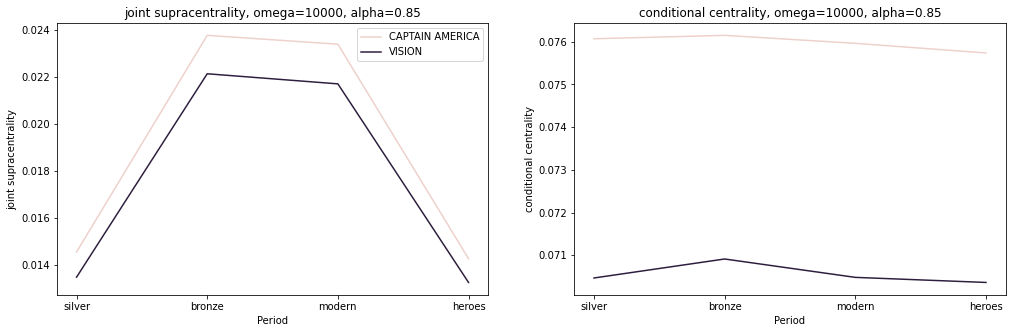

In [11]:
alpha = 0.85
ids = [7, 43]
# ids = np.arange(0, 47)
omega = 10000  # w, needs to be tuned
joints = supraCentrality(M,At,omega,centrality_function)
marginals,conditionals = get_marginal_and_conditional(joints)
with sns.cubehelix_palette(2): 
    plotter(joints,conditionals,omega,alpha,ids)

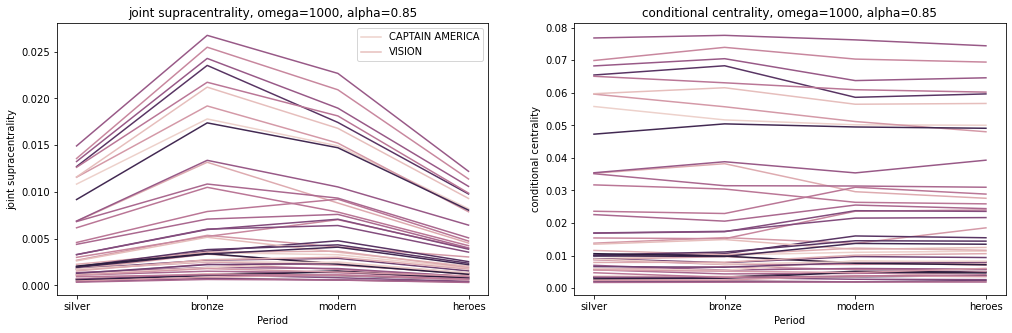

In [12]:
ids = [2, 4, 10, 11, 12, 15, 17, 25, 26, 33, 37, 38, 43]
ids = np.arange(0, 47)
omega = 1000  # w, needs to be tuned
joints = supraCentrality(M,At,omega,centrality_function)
marginals,conditionals = get_marginal_and_conditional(joints)
with sns.cubehelix_palette(13): 
    plotter(joints,conditionals,omega,alpha,ids)

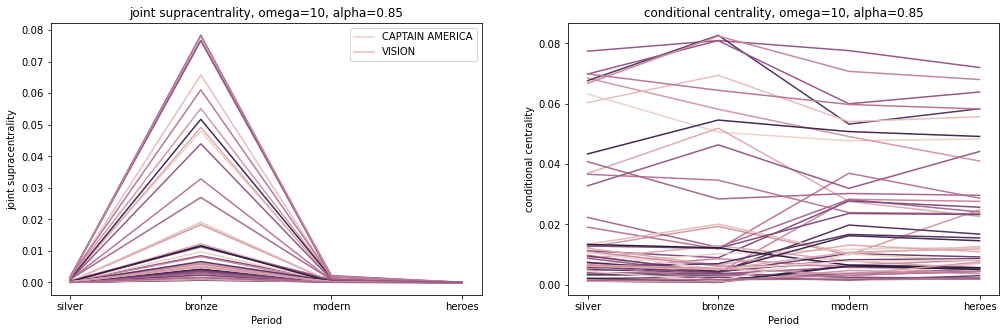

In [13]:
ids = [2, 4, 10, 11, 12, 15, 17, 25, 26, 33, 37, 38, 43]
ids = np.arange(0, 47)
omega = 10  # w, needs to be tuned
joints = supraCentrality(M,At,omega,centrality_function)
marginals,conditionals = get_marginal_and_conditional(joints)
with sns.cubehelix_palette(13): 
    plotter(joints,conditionals,omega,alpha,ids)

In [14]:
omega = 10  # w, needs to be tuned
joints = supraCentrality(M,At,omega,centrality_function)
marginals,conditionals = get_marginal_and_conditional(joints)

In [15]:
joints

array([[1.50216292e-03, 4.79351538e-02, 1.33181370e-03, 2.97804642e-05],
       [8.95458272e-05, 2.18787739e-03, 3.94088860e-05, 1.29229231e-06],
       [8.75933939e-04, 4.91860229e-02, 7.71338340e-04, 1.39514763e-05],
       [2.96789314e-04, 1.83172676e-02, 2.77126771e-04, 1.53137690e-05],
       [2.32282109e-04, 3.77152590e-03, 7.90805809e-04, 1.70352244e-05],
       [8.69618611e-04, 3.28425233e-02, 6.68042044e-04, 1.44745154e-05],
       [5.29974547e-04, 1.17524040e-02, 7.89682469e-04, 1.48591249e-05],
       [1.83901832e-03, 7.67159248e-02, 2.16689512e-03, 4.43733303e-05],
       [2.67263705e-04, 8.46909934e-03, 7.75092869e-04, 1.58295884e-05],
       [4.91187280e-05, 2.36393908e-03, 4.44905862e-05, 1.83045949e-06],
       [1.19093139e-04, 3.91710998e-03, 5.52399642e-04, 1.03311060e-05],
       [7.80894861e-05, 3.03918526e-03, 9.27082435e-05, 2.70466453e-06],
       [4.95200583e-05, 9.67985270e-04, 1.80166913e-04, 3.46800196e-06],
       [1.60986061e-04, 9.71489984e-03, 3.27962031e

## Undirected coupling of time layers


In [18]:
def plotter2(omegas,
             alpha,
             ids,
             Att):    

    fig = plt.figure(figsize = (10,4))
    textures = ['-'] * 47
    names = ['joint centrality','conditional centrality']


    for i,omega in enumerate(omegas):
        print(omega)
        centrality_function = lambda A: A #google_matrix(sparse.csc_matrix(A),alpha=alpha).T
        joints = supraCentrality(M,Att,omega,centrality_function)
        marginals,conditionals = get_marginal_and_conditional(joints)

        ax1 = fig.add_subplot(2,len(omegas),i+1)
        ax2 = fig.add_subplot(2,len(omegas),i+1+len(omegas))
        for ii,n in enumerate(ids):
            ax1.plot(temporal_MC_graph['layer_names'],joints[n],textures[ii]);        
        #ax1.set_xticks(['1950','1960','1970','1980','1990','2000']);
        ax1.set_xticks(temporal_MC_graph['layer_names']);        
        #ax1.set_xlabel('year');
        
        #ax1.set_title(names[0]+', omega='+str(omega)+', alpha='+str(alpha)+'');
        ax1.set_title('$\omega='+str(omega)+'$');            
        for ii,n in enumerate(ids):
            ax2.plot(temporal_MC_graph['layer_names'],conditionals[n],textures[ii]);
            
        #ax2.legend(['Harvard', 'MIT', 'Princeton', 'Stanford', 'UC Berkeley']);
        #ax2.set_xticks(['1950','1960','1970','1980','1990','2000']);
        ax2.set_xticks(temporal_MC_graph['layer_names']);
        ax2.set_xlabel('Period');
        
        #ax2.set_title(names[1]+', omega='+str(omega)+', alpha='+str(alpha)+'');    
        #ax2.set_title('$\omega='+str(omega));    
        
        if i==0:
            #ax1.legend(['Harvard', 'MIT', 'Princeton', 'Stanford', 'UC Berkeley']);           
            ax1.set_ylabel(names[0]);
            ax2.set_ylabel(names[1]);
            
        #ax1.set_ylim([0,.01])    
        #ax2.set_ylim([0,.25])            
        plt.subplots_adjust(top=0.99, bottom=0.01, left=0.1, right=0.99, hspace=0.25,wspace=0.3)
        plt.tight_layout()
        if i==3:
            x = sparse_power_method(Att) 
            ax1.plot( temporal_MC_graph['layer_names'],
                     x*mean(joints[46,:])*shape(joints)[1],'k:',linewidth=2)
            
    fname = fig_folder+'/undirected_chain.pdf'
    savefig(fname,pad_inches=0.1)
    return

1
10
100
1000


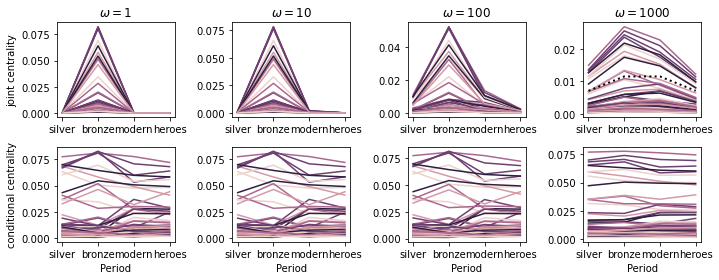

In [19]:
omegas = [1,10,100,1000]
with sns.cubehelix_palette(5): 
    plotter2(omegas,alpha,ids,At)

## Directed coupling of time layers

In [29]:
def plotter3(omegas,
             alpha,
             gamma,
             ids,
             names,
             Att,
             fig_folder):
    
    fig = plt.figure(figsize = (10,4))
    
    for i,omega in enumerate(omegas):
        print(omega)
        centrality_function = lambda A: A# google_matrix(sparse.csc_matrix(A),alpha=alpha).T
        joints = supraCentrality(M,Att,omega,centrality_function)        
        #joints = supraCentrality(M,Att,omega,alpha)
        marginals,conditionals = get_marginal_and_conditional(joints)

        ax1 = fig.add_subplot(2,len(omegas),i+1)
        ax2 = fig.add_subplot(2,len(omegas),i+1+len(omegas))
        for n in ids:
            ax1.plot(temporal_MC_graph['layer_names'],joints[n]);        

        ax1.set_xticks(temporal_MC_graph['layer_names']);        
        ax1.set_title('$\omega='+str(omega)+'$');            
        for n in ids:
            ax2.plot(temporal_MC_graph['layer_names'],conditionals[n]);
            
        ax2.set_xticks(temporal_MC_graph['layer_names']);
        ax2.set_xlabel('period');
                
        plt.subplots_adjust(top=0.99, bottom=0.01, left=0.01, right=0.99, hspace=0.25,wspace=0.3)
        plt.tight_layout()
        if i==3:
            x = sparse_power_method(Att)    
            ax1.plot(temporal_MC_graph['layer_names'],x*mean(joints[46,:])*shape(joints)[1],'k:',linewidth=2)

    fname = fig_folder+'/B_gamma='+str(gamma)+'.pdf'
    savefig(fname,pad_inches=0.1)
    return



0.1
1
10
100


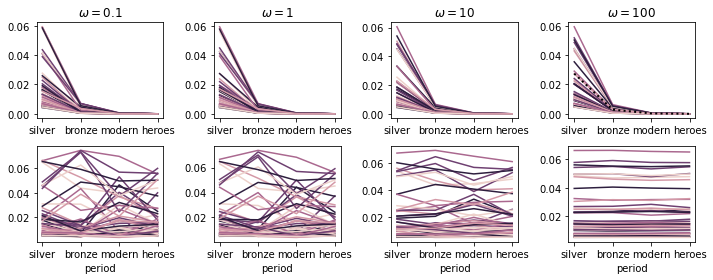

In [30]:
omegas = [.1,1,10,100]
names = ['joint centrality','conditional centrality']
fig_folder = 'figs'

gamma = .0001
At2 = directed_chain(len(M),gamma)

with sns.cubehelix_palette(5): 
    plotter3(omegas,alpha,gamma,ids,names,At2,fig_folder)

0.1
1
10
100


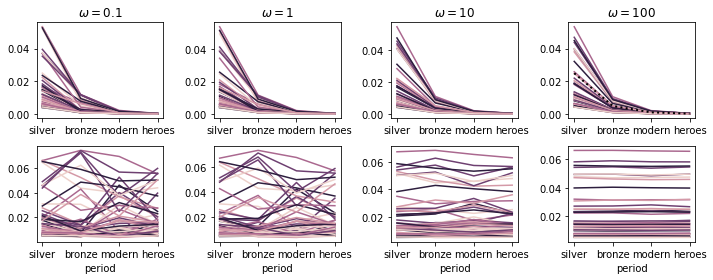

In [40]:
gamma = .001
At2 = directed_chain(len(M),gamma)
with sns.cubehelix_palette(5): 
    plotter3(omegas,alpha,gamma,ids,names,At2,fig_folder)

0.1
1
10
100


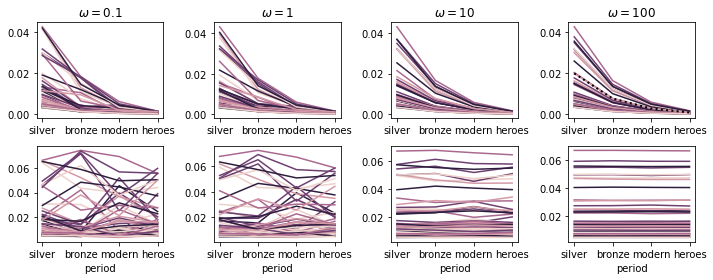

In [41]:
gamma = .01
At2 = directed_chain(len(M),gamma)
with sns.cubehelix_palette(5): 
    plotter3(omegas,alpha,gamma,ids,names,At2,fig_folder)

## Reverse the direction of interlayer coupling

0.1
1
10
100


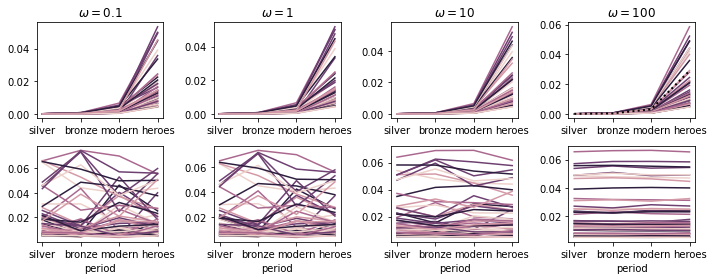

In [42]:
gamma = .0001
At2 = directed_chain(len(M),gamma)
with sns.cubehelix_palette(5): 
    plotter3(omegas,alpha,gamma,ids,names,At2.T,fig_folder)

0.1
1
10
100


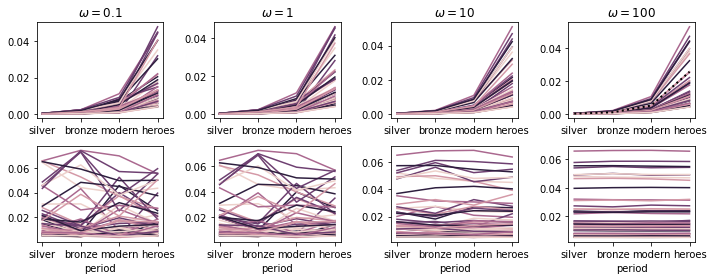

In [43]:
gamma = .001
At2 = directed_chain(len(M),gamma)
with sns.cubehelix_palette(5): 
    plotter3(omegas,alpha,gamma,ids,names,At2.T,fig_folder)

0.1
1
10
100


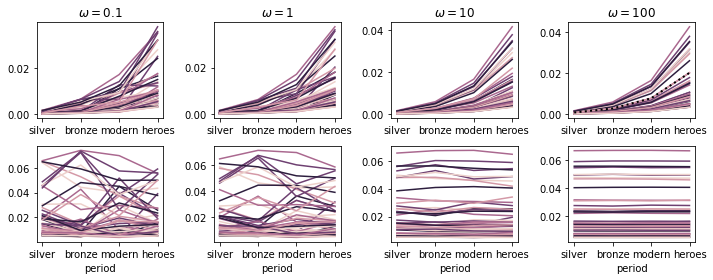

In [44]:
gamma = .01
At2 = directed_chain(len(M),gamma)
with sns.cubehelix_palette(5): 
    plotter3(omegas,alpha,gamma,ids,names,At2.T,fig_folder)